### Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

#setting plot style
plt.style.use('seaborn-darkgrid')
df= pd.read_csv("/Users/tevfikerkut/Downloads/fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

#setting plot style
plt.style.use('seaborn-darkgrid')

In [37]:
df = df.iloc[:,1:]

In [38]:
#let us look at the number of unique values in the dataset
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [39]:
# lets look at null values in our dataset

df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Great!

In [40]:
# what about types?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

Let's change time objects into datetime objects.

In [41]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [42]:
# deriving extra columns from 'trans_date_trans_time'
#deriving hour
df['tx_hour'] = df['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
df['tx_dayofweek'] = df['trans_date_trans_time'].dt.day_name()
#deriving 'year_month'
df['tx_month'] = df['trans_date_trans_time'].dt.to_period('M')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,tx_hour,tx_dayofweek,tx_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


In [43]:
# calculating age
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - 
                      df['dob'])/np.timedelta64(1, 'Y'))
df.age.head()

0   31.000000
1   41.000000
2   57.000000
3   52.000000
4   33.000000
Name: age, dtype: float64

In [44]:
#dropping unneeded variables
df.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,tx_hour,tx_dayofweek,tx_month,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000


In [46]:
#determing the shape of the dataset
df.shape

(1296675, 22)

In [47]:
#describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.000000,417192042079641088.000000,1308806447000789248.000000,60416207185.000000,180042946491150.000000,3521417320836166.000000,4642255475285942.000000,4992346398065154048.000000
amt,1296675.000000,70.351035,160.316039,1.000000,9.650000,47.520000,83.140000,28948.900000
zip,1296675.000000,48800.671097,26893.222476,1257.000000,26237.000000,48174.000000,72042.000000,99783.000000
lat,1296675.000000,38.537622,5.075808,20.027100,34.620500,39.354300,41.940400,66.693300
long,1296675.000000,-90.226335,13.759077,-165.672300,-96.798000,-87.476900,-80.158000,-67.950300
city_pop,1296675.000000,88824.440563,301956.360689,23.000000,743.000000,2456.000000,20328.000000,2906700.000000
unix_time,1296675.000000,1349243636.726123,12841278.423360,1325376018.000000,1338750742.500000,1349249747.000000,1359385375.500000,1371816817.000000
merch_lat,1296675.000000,38.537338,5.109788,19.027785,34.733572,39.365680,41.957164,67.510267
merch_long,1296675.000000,-90.226465,13.771091,-166.671242,-96.897276,-87.438392,-80.236796,-66.950902
is_fraud,1296675.000000,0.005789,0.075863,0.000000,0.000000,0.000000,0.000000,1.000000


In [48]:
# Let's check the distribution of our target variable
100*df.is_fraud.value_counts(normalize=True)

0   99.421135
1    0.578865
Name: is_fraud, dtype: float64

It's indeed very imbalanced!

## Exploratary Data Analysis

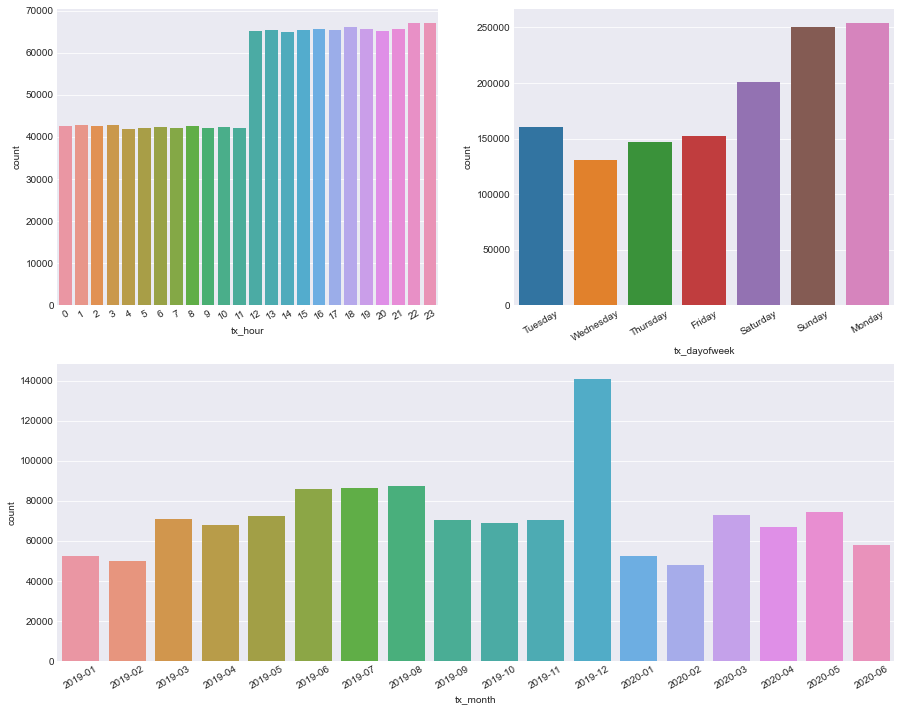

In [49]:
fix, ax = plt.subplots(figsize=(15,12))

plot = [0,0,0]
#plotting the 'tx_hour' feature
plot[0] = sns.countplot(df.tx_hour, ax = plt.subplot(221))
#plotting the 'tx_week' feature
plot[1] = sns.countplot(df.tx_dayofweek, ax = plt.subplot(222))
#plotting the 'tx_month' feature
plot[2] = sns.countplot(df.tx_month, ax = plt.subplot(212))

for i in plot:
  i.set_xticklabels(i.get_xticklabels(), rotation=30)
plt.show()

In [51]:
# Number of transactions per month
df_tx_periods = df.groupby(df['tx_month'])[['trans_num','cc_num']].nunique().reset_index()
df_tx_periods.columns = ['year_month','num_of_transactions','customers']
df_tx_periods

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


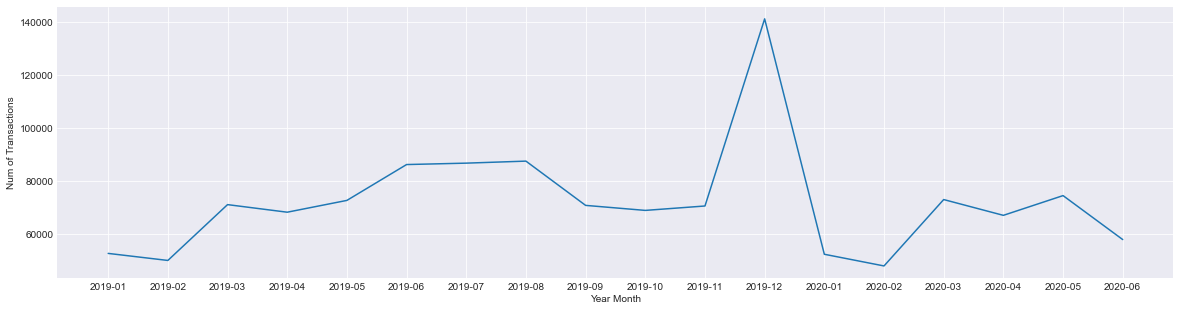

In [52]:
x = np.arange(0,len(df_tx_periods),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_tx_periods['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_tx_periods['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

In [54]:
df_fraudulent_transactions = df[df['is_fraud']==1]

df_fraudulent_periods = df_fraudulent_transactions.groupby(df_fraudulent_transactions['tx_month'])[['trans_num','cc_num']].nunique().reset_index()
df_fraudulent_periods.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_fraudulent_periods

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


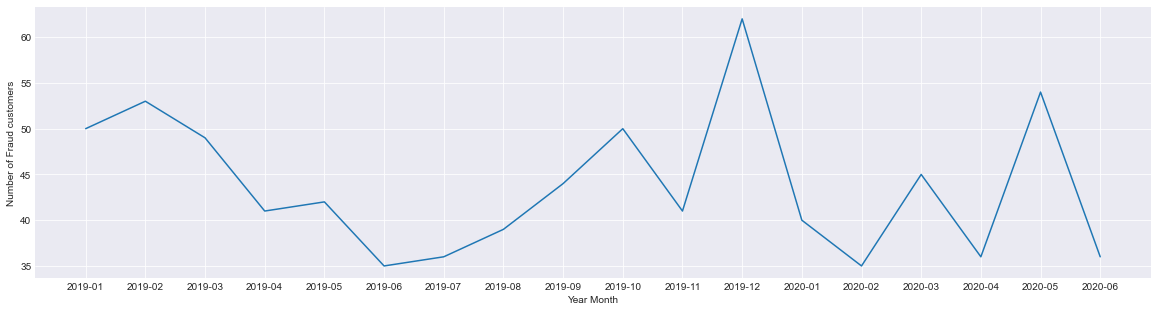

In [55]:
x = np.arange(0,len(df_fraudulent_periods),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_fraudulent_periods['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_fraudulent_periods['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud customers')
plt.show()

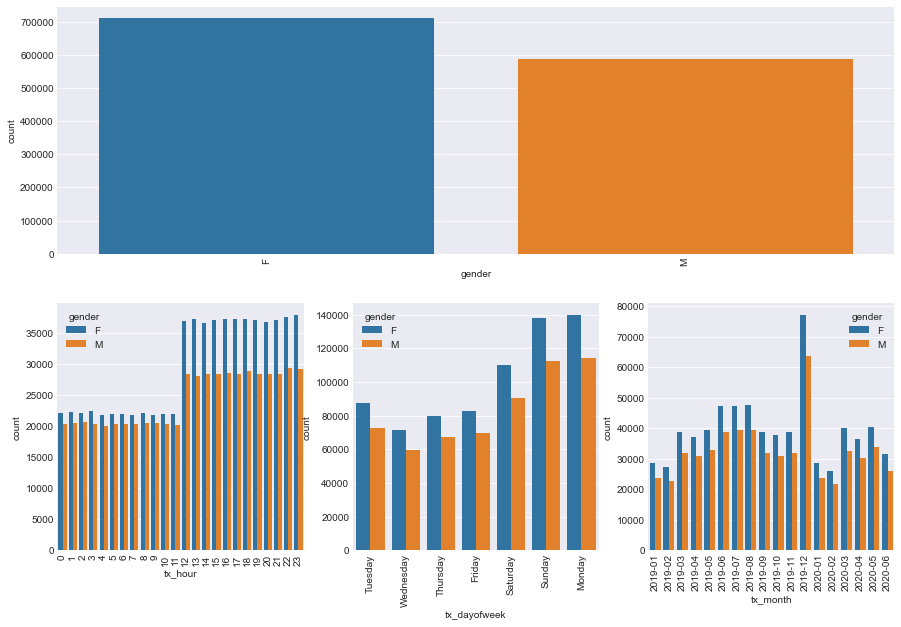

In [56]:
fig, ax = plt.subplots(figsize=(15,10))

plot = [0,0,0,0]
#plotting gender demographic with respect to transactions
plot[0] = sns.countplot(df.gender, ax=plt.subplot(211))
#plotting transactions over time, with respect to gender
plot[1] = sns.countplot(df.tx_hour, hue=df.gender, ax=plt.subplot(234))
plot[2] = sns.countplot(df.tx_dayofweek, hue=df.gender, ax=plt.subplot(235))
plot[3] = sns.countplot(df.tx_month, hue=df.gender, ax=plt.subplot(236))

for i in plot:
  i.set_xticklabels(i.get_xticklabels(), rotation=90)
plt.show()

In [57]:
#creating the 'gender' distributed dataframe
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender', 'gender_count']

#creating gender-fraud distribution
df_fraud_gender = df[['gender','trans_num', 'is_fraud']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender', 'is_fraud', 'Transaction Count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender', 'gender_count']], how='inner', on='Gender')

df_fraud_gender['Transaction percentage'] = (df_fraud_gender['Transaction Count']/df_fraud_gender['gender_count'])*100

df_fraud_gender

,Gender,is_fraud,Transaction Count,gender_count,Transaction percentage
0,F,0,706128,709863,99.473842
1,F,1,3735,709863,0.526158
2,M,0,583041,586812,99.357375
3,M,1,3771,586812,0.642625


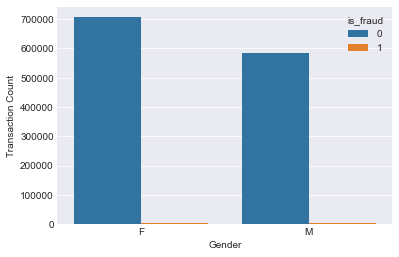

In [58]:
sns.barplot(data=df_fraud_gender, y='Transaction Count', x='Gender', hue='is_fraud')

plt.show()

In [59]:
# let's categorize the age variable
for i in range(len(df.age)):
  if df.age[i] <= 29:
    df.age[i] = '< 29'
  elif df.age[i] > 29 and df.age[i] <= 42:
    df.age[i] = '29-42'
  elif df.age[i] > 42 and df.age[i] <= 55:
    df.age[i] = '42-55'
  elif df.age[i] > 55 and df.age[i] <= 75:
    df.age[i] = '55-75'
  else:
    df.age[i] = '> 75'

df.age.head()

0    29-42
1    29-42
2    55-75
3    42-55
4    29-42
Name: age, dtype: object

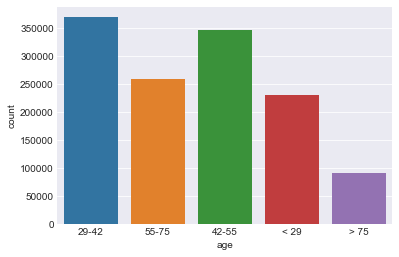

In [60]:
#plotting the age feature in the data
plot = sns.countplot(df.age)

plt.show()

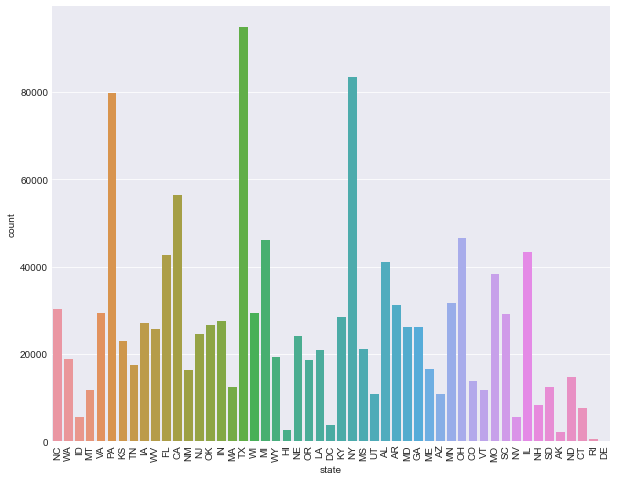

In [61]:
#let us now explore the city, zip and state features
fig, ax = plt.subplots(figsize=(10,8))

#plotting state feature
plot = sns.countplot(df.state)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [62]:
print('number of cities: ',df.city.nunique())
print('number of zip codes: ',df.zip.nunique())

number of cities:  894
number of zip codes:  970


high frequencies cities:  ['Birmingham', 'San Antonio', 'Utica', 'Phoenix', 'Meridian', 'Thomas', 'Conway', 'Cleveland', 'Warren', 'Houston', 'Burbank', 'Naples', 'Arcadia', 'Indianapolis', 'Brandon', 'Fulton', 'Lahoma', 'Allentown', 'Lakeland', 'Dallas']
high frequencies zip codes:  [73754, 34112, 48088, 82514, 49628, 15484, 85173, 29819, 38761, 5461, 44233, 4287, 72042, 16858, 28405, 26292, 12419, 80120, 6024, 98238]


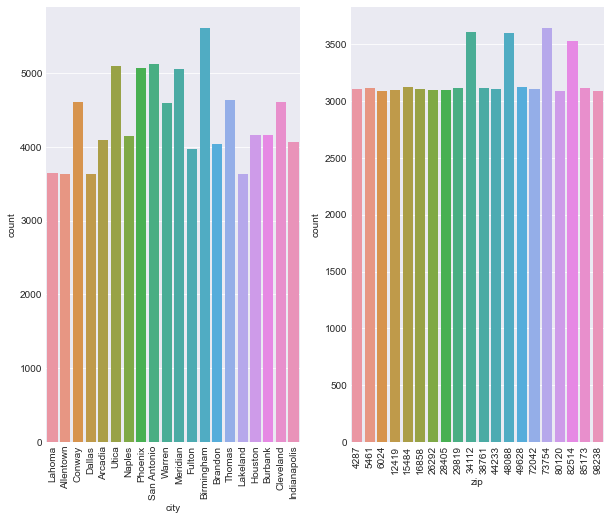

In [63]:
high_trans_cities = df.city.value_counts().head(20).index.tolist()
high_trans_zips = df.zip.value_counts().head(20).index.tolist()
print('high frequencies cities: ', high_trans_cities)
print('high frequencies zip codes: ', high_trans_zips)

fig, ax = plt.subplots(figsize=(10,8))
#plotting the cities transaction frequencies again
plots = []
plots.append(sns.countplot(df[df.city.isin(high_trans_cities)].city, ax=plt.subplot(121)))
plots.append(sns.countplot(df[df.zip.isin(high_trans_zips)].zip, ax=plt.subplot(122)))

for i in plots:
  i.set_xticklabels(i.get_xticklabels(), rotation=90)
plt.show()

In [64]:
#fetching top 20 jobs with high transaction frequencies
high_trans_jobs = df.job.value_counts().head(20).index.tolist()
print(high_trans_jobs)

['Film/video editor', 'Exhibition designer', 'Naval architect', 'Surveyor, land/geomatics', 'Materials engineer', 'Designer, ceramics/pottery', 'Systems developer', 'IT trainer', 'Financial adviser', 'Environmental consultant', 'Chartered public finance accountant', 'Scientist, audiological', 'Chief Executive Officer', 'Copywriter, advertising', 'Comptroller', 'Sub', 'Podiatrist', 'Agricultural consultant', 'Paramedic', 'Magazine features editor']


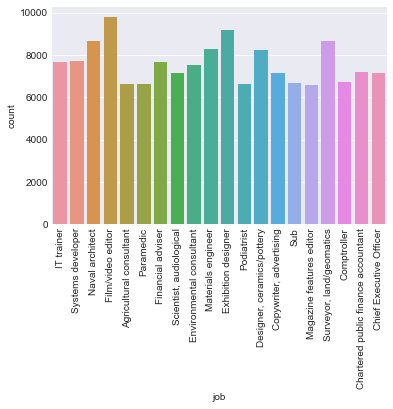

In [65]:
#plotting the transaction counts in the top 20 jobs
plot = sns.countplot(df[df.job.isin(high_trans_jobs)].job)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype    
---  ------        --------------    -----    
 0   cc_num        1296675 non-null  int64    
 1   merchant      1296675 non-null  object   
 2   category      1296675 non-null  object   
 3   amt           1296675 non-null  float64  
 4   gender        1296675 non-null  object   
 5   street        1296675 non-null  object   
 6   city          1296675 non-null  object   
 7   state         1296675 non-null  object   
 8   zip           1296675 non-null  int64    
 9   lat           1296675 non-null  float64  
 10  long          1296675 non-null  float64  
 11  city_pop      1296675 non-null  int64    
 12  job           1296675 non-null  object   
 13  trans_num     1296675 non-null  object   
 14  unix_time     1296675 non-null  int64    
 15  merch_lat     1296675 non-null  float64  
 16  merch_long    1296675 non-null  floa

In [76]:
df["visited_city_number_of_the_customer"] = df.groupby("cc_num")["city"].transform("nunique")

In [78]:
for i in ["category", "gender", "tx_dayofweek", "tx_hour", "age"]:
    df[i] = df.groupby(i)["is_fraud"].transform("mean")

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ["street", "state", "city", "job", "tx_month"]:
    df[i] = le.fit_transform(df[i])
    

In [85]:
df = df.drop(columns = ["merchant", "trans_num"])

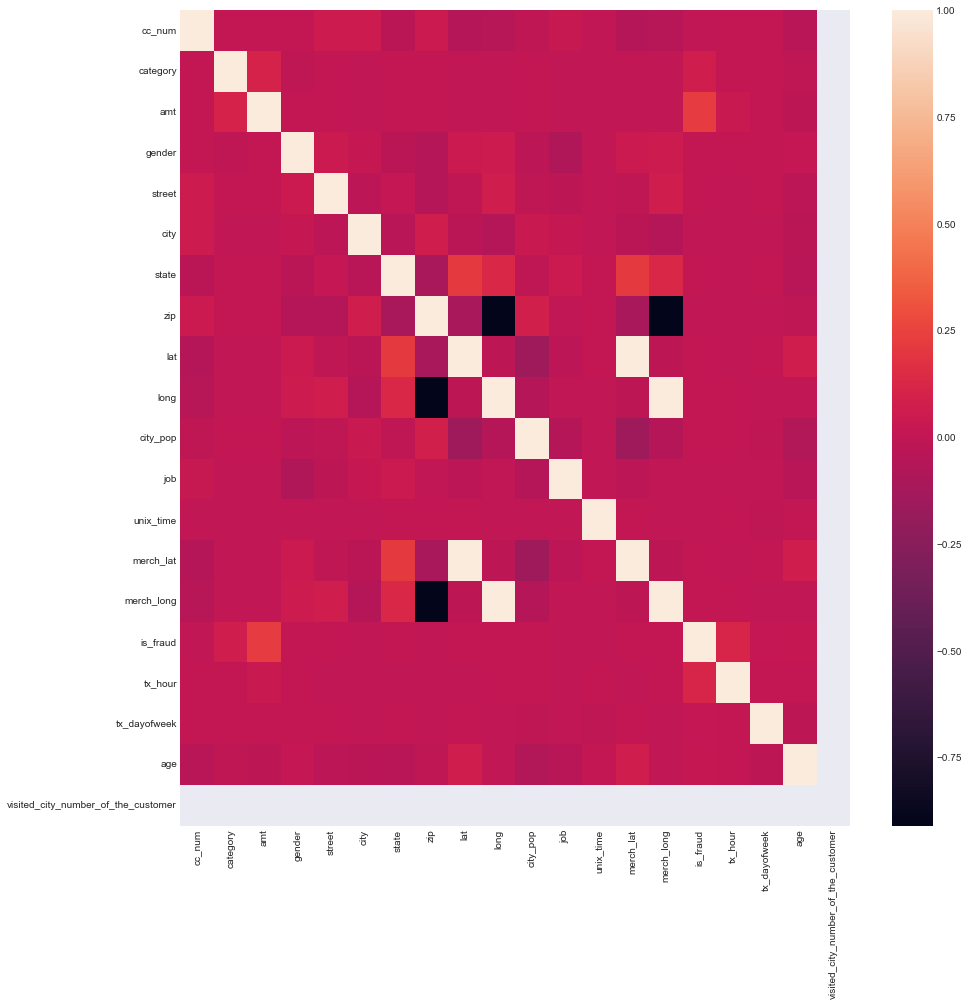

In [86]:
#let us now check the correlations between the columns
df_random_under_corr = df.corr()
#plotting the correlation heatplot
plt.figure(figsize=(15,15))
sns.heatmap(df_random_under_corr)
plt.show()

In [94]:
#innput-output split
X = df.drop(['is_fraud', "cc_num"],axis=1)
y = df.is_fraud

In [95]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state = 42, stratify = y)

In [97]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


In [98]:
#evaluating the model
model_name = 'Logistic Regression - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994525,0.994505,0.994505,0.992602,0.640741,0.115256


In [99]:
from sklearn.metrics import roc_auc_score

In [100]:
roc_auc_score(y_test, y_test_pred)

0.5574401423095163

In [101]:
import lightgbm as lgbm

lgbm_model = lgbm.LGBMClassifier(objective = "binary")
model = lgbm_model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


### LightGBM Model

In [102]:
#evaluating the model
model_name = 'LightGBM model - without tuning'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,LightGBM model - without tuning,0.998013,0.997359,0.997359,0.997320,0.788136,0.743504


In [103]:
roc_auc_score(y_test, y_test_pred)

0.8711703955574306

In [106]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
model = xgb_model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

[07:34:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


In [107]:
#evaluating the model
model_name = 'XGBoost model - without tuning'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,XGBoost model - without tuning,0.999344,0.998812,0.998812,0.998764,0.967843,0.822119


In [108]:
roc_auc_score(y_test, y_test_pred)

0.9109797852831443

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
model = rf_model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


In [110]:
#evaluating the model
model_name = 'Random Forest Model'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest model,0.999999,0.998315,0.998315,0.998195,0.973310,0.728847


In [111]:
roc_auc_score(y_test, y_test_pred)

0.8643655405550769